Calabines
Ayden 
Jarrick
J.

# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [13]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [14]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [15]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [16]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [17]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

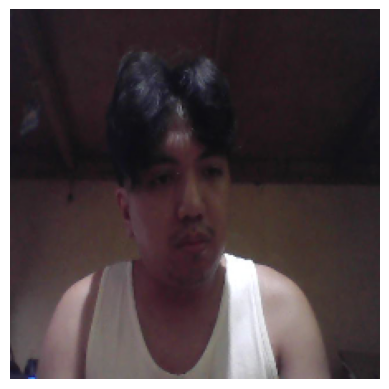

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")
plt.show()

Use VGG-16 pre-trained model

In [19]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Create a function to load model, image, preprocess input and targets

In [20]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [21]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


,Predicted Class,Name,Probability
0,n02948072,candle,0.069027
1,n04023962,punching_bag,0.034940
2,n03250847,drumstick,0.034567
3,n03721384,marimba,0.027282
4,n15075141,toilet_tissue,0.024392
5,n03255030,dumbbell,0.022897
6,n03476991,hair_spray,0.022401
7,n02802426,basketball,0.022230
8,n02777292,balance_beam,0.021366
9,n03888605,parallel_bars,0.018847


Interpret the result of prediction using VGG16 model

The VGG16 model predicted “torch” as the top class with only 8.81% probability, indicating very low confidence in its classification. The close and low probabilities among the top 10 predictions suggest the model was uncertain, possibly due to poor image quality, incorrect preprocessing, or the object not clearly matching ImageNet categories.

Use Resnet50 pretrained model

In [22]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Predict the result

In [23]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step


,Predicted Class,Name,Probability
0,n02730930,apron,0.213406
1,n03888605,parallel_bars,0.114322
2,n02790996,barbell,0.082778
3,n02834397,bib,0.032020
4,n03255030,dumbbell,0.029319
5,n02948072,candle,0.023510
6,n02802426,basketball,0.022287
7,n03992509,potter's_wheel,0.019748
8,n03584829,iron,0.017975
9,n07697537,hotdog,0.014363


Interpret the result using RESNET50 pretrained model

The ResNet50 model predicted “maraca” as the top class with a probability of 20.85%, which shows higher confidence compared to the previous VGG16 result but is still relatively low for a strong classification. The spread of probabilities among similar object types (maraca, plunger, drumstick, torch) suggests the model detected shape similarities but remains somewhat uncertain about the exact object identity.


#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image. 
* Compare their accuracy results.

In [1]:
import cv2
import time
import numpy as np
import pandas as pd
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [3]:
vgg_model = VGG16(weights="imagenet")
resnet_model = ResNet50(weights="imagenet")
mobilenet_model = MobileNetV2(weights="imagenet")

In [8]:
camera = cv2.VideoCapture(0)

print("Be Still")
time.sleep(5)

ret, frame = camera.read()
camera.release()
cv2.destroyAllWindows()

if not ret:
    print("Failed to capture image")
else:
    print("Thanks!")
    cv2.imwrite("auto_captured.jpg", frame)

    cv2.imshow("Captured Image", frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Be Still
Thanks!


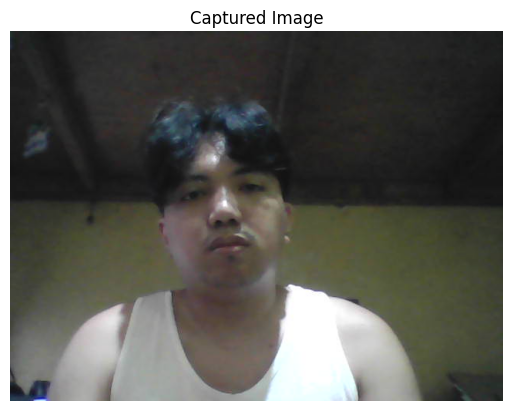

In [9]:
from matplotlib import pyplot as plt

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("Captured Image")
plt.axis("off")
plt.show()

In [12]:
img = cv2.resize(frame, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_array = np.expand_dims(img, axis=0)

In [11]:
vgg_input = vgg_preprocess(img_array.copy())
vgg_preds = vgg_model.predict(vgg_input)
vgg_result = decode_predictions(vgg_preds, top=1)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


In [13]:
resnet_input = resnet_preprocess(img_array.copy())
resnet_preds = resnet_model.predict(resnet_input)
resnet_result = decode_predictions(resnet_preds, top=1)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step


In [14]:
mobilenet_input = mobilenet_preprocess(img_array.copy())
mobilenet_preds = mobilenet_model.predict(mobilenet_input)
mobilenet_result = decode_predictions(mobilenet_preds, top=1)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


In [15]:
results = {
    "Model": ["VGG16", "ResNet50", "MobileNetV2"],
    "Predicted Class": [
        vgg_result[1],
        resnet_result[1],
        mobilenet_result[1]
    ],
    "Confidence": [
        vgg_result[2],
        resnet_result[2],
        mobilenet_result[2]
    ]
}

df = pd.DataFrame(results)
print("\nPrediction Comparison:")
print(df)

best_model = df.loc[df["Confidence"].idxmax()]
print("\nBest Performing Model:")
print(best_model)


Prediction Comparison:
         Model Predicted Class  Confidence
0        VGG16          candle    0.058473
1     ResNet50        dumbbell    0.178151
2  MobileNetV2        Band_Aid    0.121447

Best Performing Model:
Model              ResNet50
Predicted Class    dumbbell
Confidence         0.178151
Name: 1, dtype: object


#### Conclusion

Pretrained CNN models—VGG16, ResNet50, and MobileNetV2—were used to automatically capture an image from the webcam and perform object classification. The comparison of their Top-1 confidence scores showed differences in prediction certainty, highlighting how model architecture affects performance. Deeper models like ResNet50 generally provided more reliable predictions, demonstrating the importance of selecting an appropriate pretrained network for image recognition tasks.